In [21]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from sklearn import datasets
from mlxtend.data import loadlocal_mnist
from sklearn.neural_network import MLPClassifier

In [22]:
images_path = '/Users/elektro/Documents/MACHINE VISION /train-images.idx3-ubyte'
labels_path = '/Users/elektro/Documents/MACHINE VISION /train-labels.idx1-ubyte'
train_images, train_labels = loadlocal_mnist(images_path=images_path, labels_path=labels_path)

In [23]:
images_path = '/Users/elektro/Documents/MACHINE VISION /t10k-images.idx3-ubyte'
labels_path = '/Users/elektro/Documents/MACHINE VISION /t10k-labels.idx1-ubyte'
test_images, test_labels = loadlocal_mnist(images_path=images_path, labels_path=labels_path)

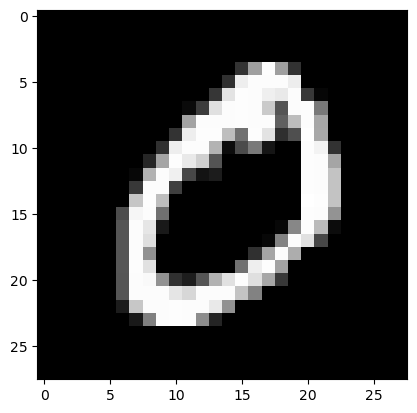

In [80]:
plt.imshow(train_images[1].reshape(28,28), cmap='gray')

In [81]:
train_labels[1]

0

In [26]:
feature, hog_img = hog(train_images[1].reshape(28,28), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2,2), visualize=True, block_norm='L2')

In [27]:
feature.shape   

(144,)

<BarContainer object of 144 artists>

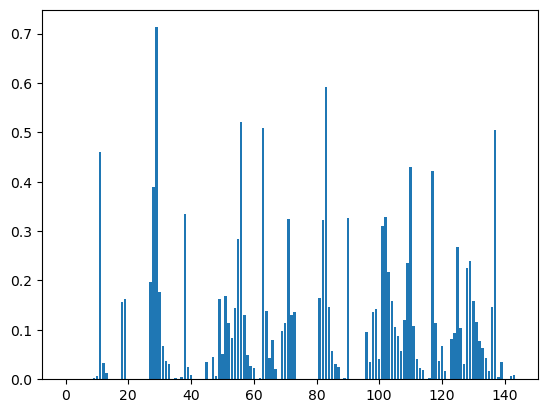

In [28]:
plt.bar(list(range(feature.shape[0])), feature)

In [29]:
feature, hog_img = hog(train_images[0].reshape(28,28), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2,2), visualize=True, block_norm='L2')

<BarContainer object of 144 artists>

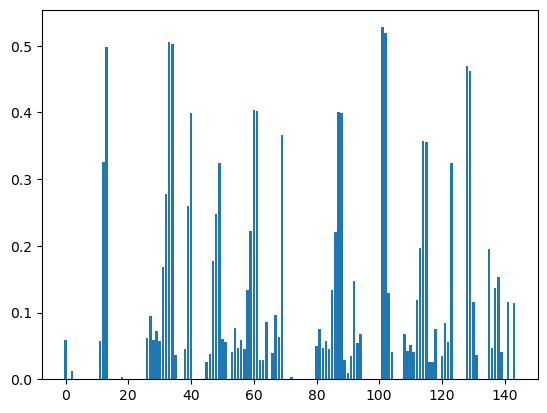

In [30]:
plt.bar(list(range(feature.shape[0])), feature)

In [31]:
n_dims = feature.shape[0]

In [32]:
n_dims 

144

In [33]:
n_samples = train_images.shape[0]

In [34]:
n_samples

60000

In [35]:
X_train, y_train = datasets.make_classification(n_samples=n_samples, n_features=n_dims)

In [36]:
X_train.shape

(60000, 144)

In [37]:
for i in range(n_samples):
    X_train[i], _ = hog(train_images[i].reshape(28,28), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2,2), visualize=True, block_norm='L2')
    y_train[i] = train_labels[i]

In [38]:
from sklearn.preprocessing import LabelBinarizer

In [39]:
lb = LabelBinarizer()

In [40]:
lb.fit(y_train)

LabelBinarizer()

In [41]:
y_train_one_hot = lb.transform(y_train)

In [42]:
y_train_one_hot[0]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [43]:
y_train[0]

5

In [44]:
import numpy as np

In [45]:
label = lb.inverse_transform(np.array([y_train_one_hot[0]]))

In [46]:
label[0]

5

In [47]:
clf = MLPClassifier(hidden_layer_sizes=(128, 64, 10), solver='sgd', learning_rate_init=0.001, max_iter=100)

In [48]:
clf.fit(X_train, y_train_one_hot)

/Users/elektro/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(128, 64, 10), max_iter=100, solver='sgd')

In [49]:
n_samples = test_images.shape[0]

In [50]:
X_test, y_test = datasets.make_classification(n_samples=n_samples, n_features=n_dims)

In [51]:
for i in range(n_samples):
    X_test[i], _ = hog(test_images[i].reshape(28,28), orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2,2), visualize=True, block_norm='L2')
    y_test[i] = test_labels[i]

In [52]:
y_test_one_hot = lb.transform(y_test)

In [53]:
y_pred_one_hot = clf.predict(X_test)

In [54]:
y_pred = lb.inverse_transform(y_pred_one_hot)

In [55]:
y_pred

array([7, 2, 1, ..., 4, 5, 6])

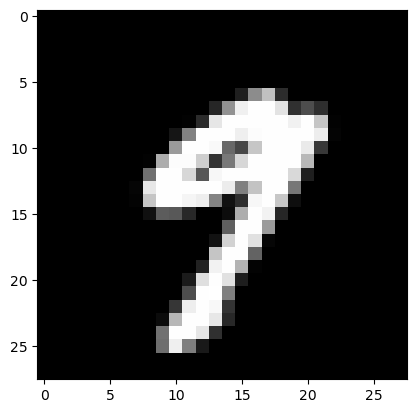

In [56]:
plt.imshow(test_images[20].reshape(28,28), cmap='gray')

In [57]:
out_one_hot = clf.predict(X_test[20].reshape(1, n_dims))

In [58]:
out_one_hot

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

In [59]:
out = lb.inverse_transform(out_one_hot.reshape(1,10))

In [60]:
out[0]

9

In [61]:
from sklearn.metrics import confusion_matrix

In [62]:
conf_mat = confusion_matrix(y_test, y_pred)

In [63]:
conf_mat

array([[ 973,    3,    1,    0,    1,    0,    1,    0,    1,    0],
       [  16, 1111,    3,    0,    2,    0,    3,    0,    0,    0],
       [  31,    1,  986,    4,    2,    0,    3,    1,    2,    2],
       [  23,    0,   16,  954,    0,    6,    0,    3,    5,    3],
       [  32,    2,    0,    0,  935,    0,    5,    1,    1,    6],
       [  24,    0,    1,    7,    0,  851,    1,    1,    5,    2],
       [  20,    1,    0,    0,    3,    7,  924,    0,    3,    0],
       [  34,    0,   17,    5,   12,    2,    0,  949,    2,    7],
       [  33,    3,    1,   14,    2,    8,    3,    2,  900,    8],
       [  35,    0,    0,    1,   12,    4,    0,    4,   19,  934]])

In [64]:
from mlxtend.plotting import plot_confusion_matrix

In [65]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

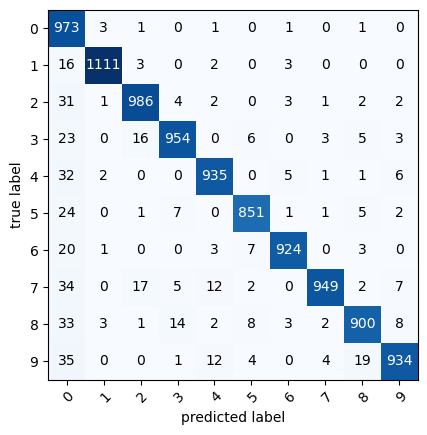

In [66]:
fig, ax = plot_confusion_matrix(conf_mat=conf_mat, class_names=class_names)

In [67]:
from sklearn.metrics import precision_score

In [68]:
precision = precision_score(y_test, y_pred, average=None)

In [69]:
precision

array([0.7968878 , 0.99107939, 0.96195122, 0.96852792, 0.96491228,
       0.96924829, 0.98297872, 0.98751301, 0.95948827, 0.97089397])

In [70]:
from sklearn.metrics import recall_score

In [71]:
recall = recall_score(y_test, y_pred, average=None)

In [72]:
recall

array([0.99285714, 0.97885463, 0.95542636, 0.94455446, 0.95213849,
       0.95403587, 0.96450939, 0.92315175, 0.92402464, 0.92566898])

In [73]:
from sklearn.metrics import accuracy_score

In [74]:
accuracy = accuracy_score(y_test, y_pred)

In [75]:
accuracy

0.9517

In [76]:
from sklearn.metrics import f1_score

In [77]:
f1 = f1_score(y_test, y_pred, average='macro')

In [78]:
f1

0.9521275766206386